# Reliability Data Plot for Weibull Distribution Using Python

 * In Relibility, we can Test to see if a common distribution will be useful a model by using a reliability data plot. 
 * This will help us visualize if the distribution of the data will fit the model
 * When plotting failure data in reliability we use exponential, weibull, normal and lognormal.

### *In an experiment Twenty test devices are stressed to investigate dielectric breakdown strength. The test was concluded at 600 hours at which time 18 units had failed. The data is shown in Table below.* 

In [4]:
# Basic libriaries to be used for the experiment
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from lifelines import WeibullFitter
from lifelines.plotting import plot_lifetimes

dat=pd.read_csv('Desktop/data1.csv') # reading the data
display(dat)

,time,event
0,0.69,1
1,0.94,1
2,1.12,1
3,6.79,1
4,9.28,1
5,9.31,1
6,9.95,1
7,12.90,1
8,12.93,1
9,21.33,1


### *In reliability censored data indicates that a failure did not occur. If you observe the event column in the table, the last 2 entries are 0. The reason because those devices did not fail during the test (lifetime distribution) of the experiment after 600 hours of runtime.*

### *The life plot below will give a careful illustration of the experiment runtime*

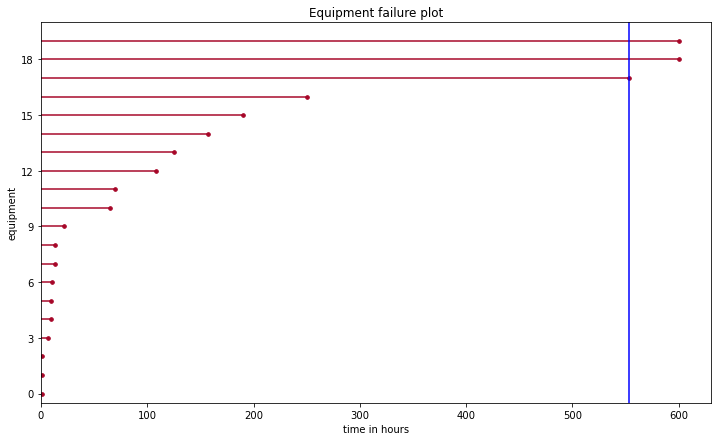

In [5]:
 # lifelines plot of the dataset to show failed and survived equipment
#df=dat.sample(25)  # random sampling of data
plt.figure(figsize=[12,7])
plot_lifetimes(dat['time'])
plt.axvline(x=552.87, color='b')  # creating a vertical line to indicate last failure point.
plt.title('Equipment failure plot')
plt.xlabel('time in hours')
plt.ylabel('equipment')
plt.show()

### *Next we would use ordinary least square regression to create a probability plot. Also weibull distribution will be used to model the results to visualize if its a reasonable fit for the data.*


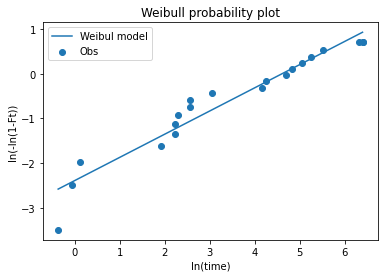

In [6]:
r=(dat['event'].cumsum()) # summing failure events to get failure rate
ft=round((r-0.3)/(20+0.4),2) # failure rate
dat['ft']=ft # add ft to the data

# ordinary least square regression
xx=np.log(dat['time'])
xxc=sm.add_constant(xx) # add constant to the intercept
yy=np.log(-np.log(1-dat['ft']))
lmres=sm.OLS(yy,xxc).fit()
plt.scatter(xx,yy,label='Obs')
plt.plot(xx,lmres.predict(xxc) ,label='Weibul model')
plt.title('Weibull probability plot')
plt.xlabel('ln(time)') # log of time
plt.ylabel('ln(-ln(1-Ft))') # weibull estimate
plt.legend()
plt.show()

### *From the plot we can see that the data is clustered along the slope line which means weibull distribution will be a good fit to model the experiment.*

### *Lets estimate the parameters of the distribution from the graph: the shape factor 𝛽 and characteristic life 𝛼.*

In [7]:
lmres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ft   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     240.7
Date:                Fri, 14 Jul 2023   Prob (F-statistic):           7.33e-12
Time:                        15:15:28   Log-Likelihood:                -3.9666
No. Observations:                  20   AIC:                             11.93
Df Residuals:                      18   BIC:                             13.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3865      0.135    -17.659      0.000      -2.670      -2.103
time           0.5181      0.033     15.514      0.000       0.448       0.588
==============================================================================
Omnibus:                        9.979   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                8.114
Skew:                          -1.029   Prob(JB):                       0.0173
Kurtosis:                       5.345   Cond. No.                         8.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
print('alpha:', np.exp(-(lmres.params.const/lmres.params.time)))
print('beta:', 1/lmres.params.time)

alpha: 100.09026262965247
beta: 1.9300826015807049


### *Lets model the survival analysis of the equipment in the experiment using weibull distribution*

### *Because weibull function in lifelines does not account for censored data, we would drop the last 2 rows of the data from the experiment because they are censored data.*

In [178]:
dat.shape
dat2=dat.drop([18,19])
display(dat2)

,time,event,ft
0,0.69,1,0.03
1,0.94,1,0.08
2,1.12,1,0.13
3,6.79,1,0.18
4,9.28,1,0.23
5,9.31,1,0.28
6,9.95,1,0.33
7,12.90,1,0.38
8,12.93,1,0.43
9,21.33,1,0.48


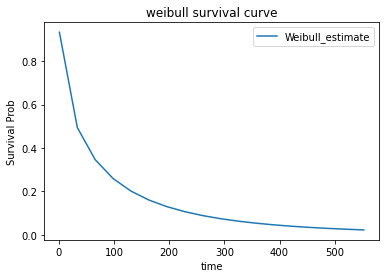

In [197]:
# survival plot of the experiment
wft=WeibullFitter()
wft.fit(dat2['time'],dat2['event'])
wft.survival_function_.plot()
plt.title('weibull survival curve')
plt.xlabel('time')
plt.ylabel('Survival Prob')
plt.show()

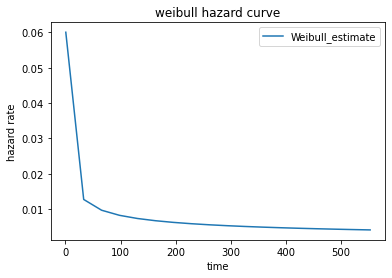

In [198]:
# hazard rate for the experiment
wft.hazard_.plot()
plt.title('weibull hazard curve')
plt.xlabel('time')
plt.ylabel('hazard rate')
plt.show()

In [223]:
display(wft.summary)

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,59.360496,24.641757,11.063539,107.657453,1.0,2.368358,0.017867,5.806538
rho_,0.600018,0.110733,0.382985,0.817050,1.0,-3.612135,0.000304,11.685128


### *You will notice that lambda and rho are different from the earlier result when we used OLS regression. This is because we did not account for censored data in the experiment. If we run this function and include censored data, our result will be much more similar. See below*

In [224]:
wft.fit(dat['time'],dat['event'])  # censored data included
display(wft.summary)

,coef,se(coef),coef lower 95%,coef upper 95%,cmp to,z,p,-log2(p)
lambda_,99.683183,47.436745,6.708871,192.657496,1.0,2.080311,3.749702e-02,4.737080
rho_,0.506242,0.096236,0.317623,0.694862,1.0,-5.130692,2.886784e-07,21.724034


### *Earlier result when we used OLS regression.: the shape factor 𝛽 and characteristic life 𝛼.*

In [10]:
print('alpha:', np.exp(-(lmres.params.const/lmres.params.time)))
print('beta:', 1/lmres.params.time)

alpha: 100.09026262965247
beta: 1.9300826015807049
